# Monte Carlo Integration

Ref: Chapter 6, Rizzo

## Basic Monte Carlo Integration

Sampling and integartion are important techniques of statistical inference problems. But, often, the target distributions are too complicated and/or the integrands are too complex or high dimensional for these problems to be solved using basic methods.

Let $p(x)$ be a pdf defined on a sample space $X$. Let $h$ be a function mapping $X$ to $\mathbf{R}$.

The goal is to estimate $E[ h(X) ]$. Normally this is an integral computed by hand ($\mu_p(h) = E[ h(x) ] = \int h(x) p(x) dx$). However, we assume that this case is too complicated to solve that way. It depends on the structure of $h$ and $p$ which can be very difficult to calculate.

In general, we will only assume that $\mu_p (|h|) < \infty$. In other words, we assume a finite first moment. 

The **monte carlo method (MCM)** is based on 2 of the most important results in probability theory:

1. Central limit theorem, CLT ($X_n \xrightarrow{} N(\mu, \sigma)$ as $n \xrightarrow{} \infty$)

2. Law of large numbers, LLN ($\bar{x}_n \xrightarrow{} E [ x ]$ as $n \xrightarrow{} \infty$)

The monte carlo method appeals to the LLN and estimates $ E[ h(X) ]$ by the sample mean of $h(x)$: 

$$\bar{h(x)} = \frac{1}{N} \sum_{i=1}^N h(X_i)$$

and $X_1, X_2, ...$ are iid with pdf $p$. This is simply the average.

Recall LLN ensures that $\bar{h(x)} \xrightarrow{} E [ h(x) ]$ as $N \xrightarrow{} \infty$

We can generate RV from $p$ using inverse method (see **Inverse methods** page). This will generate a set of values $h(x_i)$. With these, we can estimate

$\bar{h(x)} = \frac{h(x_1) + h(x_2) + ... + h(x_n)}{N}$

by the LLN. If the estimate is bad, we need a larger $N$.

The confidence inteval can be defined for $E[ h(x)]$ by appealing to the CLT. The sample variance of $\bar{h(x)}$ is

$$Var(\bar{h(x)}) = \frac{\hat{Var}(h(x))}{N} = \frac{1}{N^2} \sum_{i=1}^N (h(x_i) - \bar{h(x)})^2$$

Because (for instance) if $X \sim (\mu, \sigma^2)$, $E[ \bar{x} ] = \mu$ and $Var(\bar{x}) = \frac{\sigma^2}{n}$.

The CLT tells us that the approximate distribution of $\bar{h(x)}$ is approximately normal ($ N(E(h(x)), \frac{var(h(x))}{N})$)

Therefore, the ($1 - \alpha$) CI for $E[ h(x)]$ is approximately 

$$\bar{h(x)} \pm z_{\alpha/2} \sqrt{\frac{\hat{Var}(h(x))}{N}}$$


**Example:** Estimate $E[ h(x)] = \int_{-\infty}^\infty \frac{1}{1 + \exp (-x)} \frac{1}{\sqrt{ (2\pi) (1.43)}} \exp (\frac{-(x - 1.5)^2}{2.86}) dx$ and give a 95% CI for $E[h(x)]$.

Using $\int h(x) p(x) dx$

Note that $h(x) = \frac{1}{1 + e^{-x}}$ and is the inverse of the logit function.

$$p(x) = \frac{1}{\sqrt{(2\pi)(1.43)}} \exp (\frac{-(x - 1.5)^2}{2.36})$$

is the pdf of the $N(1.5, 1.43)$. To estimate this integral, 

Step 1: Generate $Z_1, Z_2, ..., Z_{n} \sim N(1.5, 1.43)$ where $n$ is just a large number, say 10000.

Step 2: Calculate $\hat{I} = \frac{1}{n} \sum_{i=1}^n \frac{1}{1 + e^{-Z_i}}$ as $n \xrightarrow{} \infty$, $\hat{I} \xrightarrow{} E[h(x)]$

In [38]:
import numpy as np
from scipy.integrate import quad

n = 1000000

# We can also estimate this using base numpy. See `inversion methods` page.
g = np.random.normal(1.5,np.sqrt(1.43),n)

def gaussian_pdf(x, mu=0, sigm=1):
    return (1 / np.sqrt(2 * np.pi * sigm**2)) * np.exp(-1 * (x - mu)**2 / (2 * sigm**2))
def h(x):
    return 1 / (1 + np.exp(-x))
def p(x):
    sigm = np.sqrt(1.43)
    mu = 1.5
    return gaussian_pdf(x, mu, sigm)

integral = (1 / n) * np.sum(h(g))
print("Integral:", integral)

variance = (1./n) * np.sum((h(g) - integral)**2)
print("Variance:", variance)

ci = (integral - 1.96 * np.sqrt(variance / n), integral + 1.96 * np.sqrt(variance / n))
print("CI:", ci)

def f(x):
    return h(x)*p(x)

estimated_integral, abs_error = quad(f,-np.inf,np.inf)
print("Estimated integral: ", estimated_integral)

Integral: 0.7657685757433373
Variance: 0.03383417980157237
var: 0.03383417980157237
CI: (0.7654080519783429, 0.7661290995083317)
Estimated integral:  0.7657308432059984


<ipython-input-38-069b21f38f26>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


For the 95\% CI for $E[h(X)]$, we will need an estimate of the variance. The corresponding variance is 

$$Var(\hat{I}) = \frac{1}{n} \sum_{i=1}^n (\frac{1}{1 + e^{-Z_i}} - \hat{I})^2$$

So, the 95\% CI for $E[h(x)]$ is $\hat{I} \mp 1.96 \sqrt{\frac{Var(\hat{I})}{n}}$


## Calculating arbitrary integrals

This is a special case also known as "sample mean". or "crude" method.

To calculate more general integrals, we generate a random variable from [a,b] and find summation.

$$\int_a^b h(x) dx = \int_a^b \frac{h(x)p(x)}{p(x)} dx = \int_a^b f(x) p(x) dx$$

where $f(x) = \frac{h(x)}{p(x)}$. This re-writes the integral as an expectation against some density $f$, generates from that density, and looks at the sample mean as before.

For definite integrals over a finite interval, the uniform distribution will suffice (but you may not get a good accuracy).

To calculate $I = \int_a^b h(x)dx$, we can proceed as

$$I = \int_a^b h(x) dx = (b-a)\int_a^b h(x) \frac{1}{b-a}dx = (b-a)\int_a^b h(x) f_{unif}(a,b)dx $$



**Example:** Estimate $\theta = \int_0^2 e^{-x^2} dx$

$\theta$ can be rewritten as

$$\theta = (2 - 0) \int_0^2 e^{-x^2} \frac{1}{2 - 0} dx = 2 \int_0^2 e^{-x^2} \frac{1}{2} dx$$

Step 1: Sample $U_1, ... U_n \sim Unif(0,2)$

Step 2: Estimate $\theta$ by $\hat{\theta} = \frac{2}{n} \sum_{i=1}^n e^{-U_i^2}$

In [5]:
import numpy as np
n = 1000
u = np.random.uniform(0,2,n)

theta = (2/n) * np.sum(np.exp(-1 * u**2))
theta

0.8659644587536548

 **Example** Estimate $\theta = \int_0^{2\pi} \sin(x \cos(x)) dx$
 
  $$\theta = (2\pi - 0) \int_0^{2\pi} \sin(x \cos(x)) \frac{1}{2\pi - 0} dx = 2\pi \int_0^{2\pi} \sin(x \cos(x)) \frac{1}{2 \pi} dx$$

  Step 1: Generate $unif(0, 2 \pi)$

  Step 2: Build $\frac{2\pi}{n} \sum_{i=1}^n sin(U_i cos(U_i))$

In [19]:
import numpy as np
n = 1000000
u = np.random.uniform(0,2*np.pi,n)
theta = (2*np.pi/n) * np.sum(np.sin(u * np.cos(u)))
theta

-1.0438478105216198

**Example:** What about $\int_{-\infty}^\infty \sin(x \cos(x))dx$?

Here, the uniform approx won't work because we cannot depend on an evaluation of $b - a$.

The way to solve this is discussed below.

## Infinite integrals

Use any distribution defined on the real line and do a similar approximation.
So, rewrite the integral as 

$$\int_{-\infty}^{\infty} h(x) dx = \int_{-\infty}^{\infty} \frac{h(x) p(x)}{p(x)} dx$$

where $p(x)$ is the pdf of a distribution defined over $\mathbf{R}$, and $h$ in any function.

Then, generate $X_i$ from $p(x)$ and estimate the integral $\int_{-\infty}^\infty h(x) dx$ by using 

$$\frac{1}{n} \sum_{i=1}^n \frac{h(x_i)}{p(x_i)} $$

per the problem earlier.

**Example** Back to the problem from earlier: compute $\int_{-\infty}^\infty \sin(x \cos(x))dx$?

The standard normal is supported over $\mathbf{R}$. So, use the standard normal pdf for the estimation.

Step 1: Generate $X_1, ..., X_n \sim N(0,1)$

Step 2: Calcualte the average, $\frac{1}{n} \sum_{i=1}^n \frac{\sin (x_i \cos(x_i))}{\phi(x_i)}$

where $\phi(.)$ is the pdf of the standard normal.

In [37]:
import numpy as np

n=1000
g = np.random.normal(0,1,n)

def gaussian_pdf(x):
    sigm = 1
    mu = 0
    return (1 / np.sqrt(2 * np.pi * sigm**2)) * np.exp(-1 * (x - mu)**2 / (2 * sigm**2))

(1./n) * np.sum( np.sin(g * np.cos(g)) / gaussian_pdf(g))

0.07370648126811634

## Higher-dimensional integrals

Monte carlo methods become particularly attractive when we consider integration in higher dimensions

$$I = \int_0^1 \int_0^1 \int_0^1 f(x, y, z) dx dy dz$$

$I$ can be estimated by

$\hat{I} = \frac{1}{n} \sum_{i=1}^n f(x_i, y_i, z_i)$ where $(x_i, y_i, z_i)$ is a random sequence of points in the unit cube $[0, 1] \times [0, 1] \times [0, 1]$.
For example,  $X_i \sim Unif(0,1), Y_i \sim Unif(0,1), Z_i \sim Unif(0,1)$.

In total, we need $3 n$ random numbers in order to generate the $N$ random points.

**Example:** $I = \int_0^1 \int_0^1 x y \exp (- x^2 y) dx dy$

Here, $f(x,y) = x y \exp (- x^2 y)$. So, 

$$\hat{I} = \frac{1}{n} \sum_{i=1}^n x_i y_i \exp (- x_i^2 y_i)$$





In [24]:
import numpy as np

n = 100000
u = np.random.uniform(0,1,n)
u2 = np.random.uniform(0,1,n)

approx = (1 / n) * np.sum(u * u2 * np.exp(- u * u2**2))
real = 1 / (2 * np.e)

approx, real

(0.18458428310422237, 0.18393972058572117)

Recall that the exact value of $I$ is $I = \frac{1}{2e}$ We see a close approximation.

In general to estimate a triple integral, for example

$$I = \int_{a_1}^{a_2} \int_{b_1}^{b_2} \int_{c_1}^{c_2} f(x,y,z) dx dy dz$$

we can use 

$$\hat{I} = (a_2 - a_1)(b_2 - b_1)(c_2 - c_1) \frac{1}{N} \sum_{i=1}^N f(x_i, y_i, z_i)$$

where $X_i \sim Unif(a_1, a_2)$, $Y_i \sim Unif(b_1, b_2)$ and $Z_i \sim Unif(c_1, c_2)$

## Importance sampling

We've seen how to estimate the integral. If want a better result in estimation, you can always generate more samples. But, an alternative is to 

**Variance reduction techniques**. This reduces the variance of your estimators. Within this, a few techniques exist: 
  
  a. Control variates

  b. antithetic variables

  c. importance sampling

**Importance sampling** is used for variance reduction, but it can also be used for other things. Importance sampling is useful 

i. in case where another distribution gives a better for to the integral we want to approximate.

ii. in cases when we want to evaluate $E(X)$ but cannot generate from the distribution of $X$.

The logic underlying importance sampling lies in a simple arrangement of terms. The target integral 

$$\int h(x) p(x) dx = \int h(x) \frac{p(x)}{g(x)} g(x) dx$$
$$ = \int h(x) w(x) g(x) dx$$

where $g(x)$ is another pdf whose supports is the same as the $p(x)$. We do this because we do not know how to sample from $p(x)$, but we know how to sample from $g(x)$.

Specifically, $w(x) = \frac{p(x)}{g(x)}$ is the **importance function**. 

**Example:** Want to calculate $\int_0^{10} \exp(-2|x-5|) dx$

The function $h(x) = \exp (-2 |x-5|)$ is peaked at 5 and decays quickly elsewhere. So, we can use something like the Gaussian function with a peak at 5 and small variance, say 1.

This would provide a greater precision.

$\int_0^{10} \exp(-2|x-5|) dx  = \int_0^{10} 10 \exp(-2|x-5|) \frac{\frac{1}{10}}{\frac{1}{\sqrt{2\pi}} \exp (-\frac{(x-5)^2}{2})} \frac{1}{\sqrt{2\pi}} \exp (- \frac{(x-5)^2}{2}) dx$

Here, $h(x) = \exp (-2 |x-5|)$, $p(x) = \frac{1}{10}$, and $g(x) = \frac{1}{\sqrt{2\pi}} \exp (- \frac{(x-5)^2}{2})$.

We use the normal distribution because it follows the shape of our original $h(x)$.

So, $E[h(x) w(x)]$ where $X \sim N(5, 1)$ and $w(x) = \frac{\sqrt{2\pi} \exp (\frac{(x-5)^2}{2})}{10}$ is the importance function.

Remarks: 

* The choice of the envelope function $g$ is important, and may require trial and error.

* In particular, the importance function $w(x) = \frac{p(x)}{g(x)}$ must be well-behaved; otherwise, the variance of the estimate could be too large.

Using basic monte carlo:  theta 0.9969382906038302 var 3.98383924464083


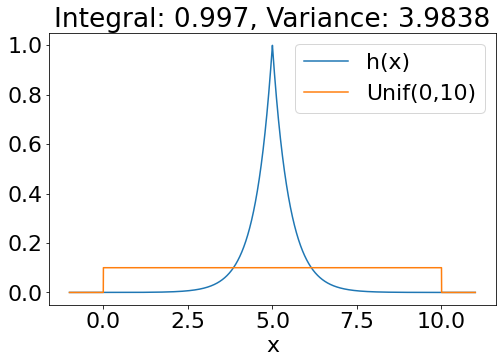

Part Norm(5,1):  theta 0.9995606909027704 var 0.3584292745710712


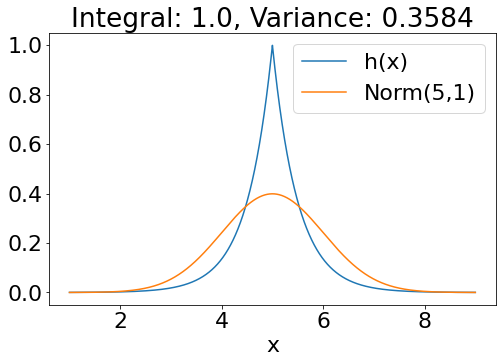

Part Norm(5,0.7):  theta 1.1978977026372482 var 0.3509316263547209


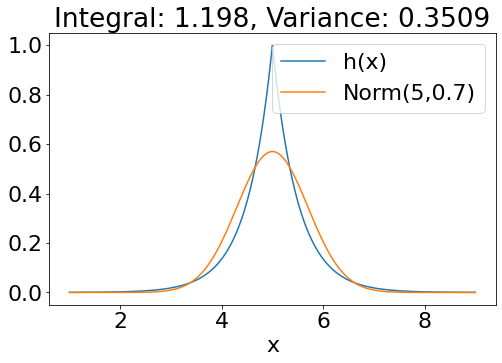

Part Laplace(5,1):  theta 0.9996766472905633 var 0.33365928102100023


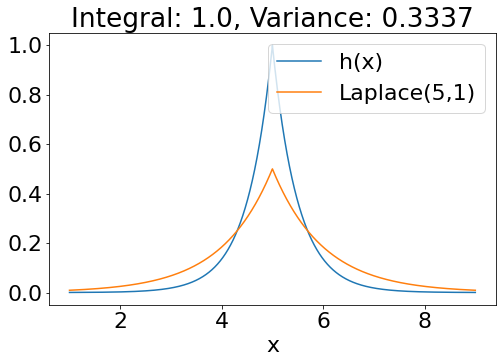

Part 3. Logistic:  theta 1.0007510795448502 var 1.0685859278976755


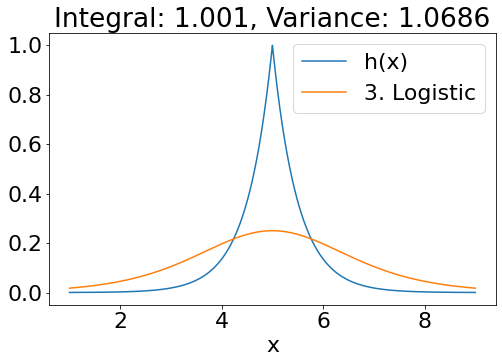

Part 3. Cauchy:  theta 1.0004597582913806 var 0.7679373506213807


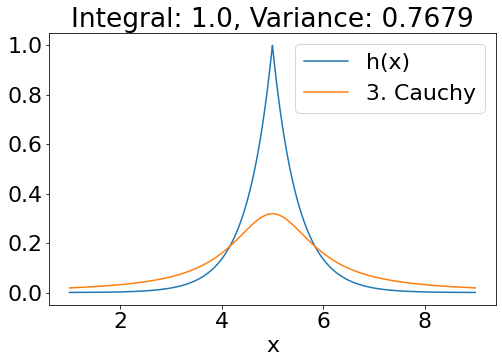

Part 3. Lognorm:  theta inf var nan


<ipython-input-82-676b8e2e1740>:55: RuntimeWarning: divide by zero encountered in true_divide
  return p(x)/distribution.pdf(x, mu, sigm)
<ipython-input-82-676b8e2e1740>:61: RuntimeWarning: invalid value encountered in subtract
  var = (1/n) * np.sum((val - np.mean(val))**2)


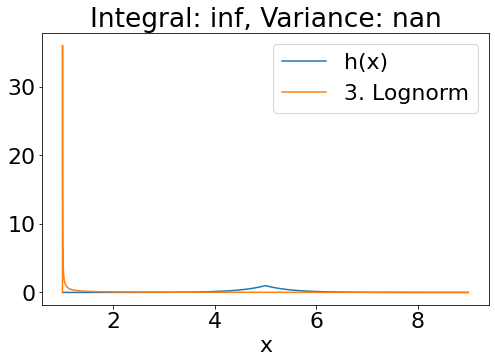

In [82]:
import numpy as np
from scipy.stats import cosine, logistic, beta, cauchy, lognorm, norm, uniform, laplace
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

# Old method
n = 1000000
def h(x):
    return np.exp(-2*np.abs(x-5))
u = np.random.uniform(0,10,n)
vals = 10 * h(u)
val = np.mean(vals)
var = (1/n) * np.sum((vals - np.mean(vals))**2)
print('Using basic monte carlo: ', 'theta', val, 'var', var)

xx = np.linspace(-1,11,num=int(12/0.001))
plt.figure(figsize=(8, 5))
plt.plot(xx, h(xx), label='h(x)')
plt.plot(xx, uniform.pdf(xx, 0, 10), label='Unif(0,10)')
plt.legend()
plt.xlabel("x")
plt.title(f"Integral: {round(val, 3)}, Variance: {round(var, 4)}")
plt.show()



mu = 5
sigm = 1
def p(x):
    return 1./10.
def w(x, distribution):
    return p(x)/distribution.pdf(x, mu, sigm)

def experiment(gval, pdf_class, part_num='2', *pdf_aargs):
    val = 10 * h(gval) * w(gval, pdf_class)

    i = 1/n * np.sum(val)
    var = (1/n) * np.sum((val - np.mean(val))**2)
    print(f'Part {part_num}: ', 'theta', i, 'var', var)

    xx = np.linspace(1,9,num=int(10/0.001))
    plt.figure(figsize=(8, 5))
    plt.plot(xx, h(xx), label='h(x)')
    plt.plot(xx, pdf_class.pdf(xx, *pdf_aargs), label=part_num)
    plt.legend()
    plt.xlabel("x")
    plt.title(f"Integral: {round(i, 3)}, Variance: {round(var, 4)}")
    plt.show()

# Part 2
gval = np.random.normal(5,1,n)
experiment(gval, norm, 'Norm(5,1)', 5,1)

# Part 3
gval = np.random.normal(5,0.7,n)
experiment(gval, norm, 'Norm(5,0.7)', 5,0.7)

gval = laplace.rvs(loc=5, scale=1, size=n)
experiment(gval, laplace, 'Laplace(5,1)', 5,1)

gval = np.random.logistic(5,1,n)
experiment(gval, logistic, '3. Logistic', 5,1)

gval = cauchy.rvs(loc=5, scale=1, size=n)
experiment(gval, cauchy, '3. Cauchy', 5,1)

gval = np.random.lognormal(5,1,n)
experiment(gval, lognorm, '3. Lognorm', 5,1)

In [32]:
import math 

import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

def crude_monte_carlo(num_samples=5000):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    lower_bound = 0
    upper_bound = 5
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

def get_crude_MC_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = 5 # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

xs = [float(i/50) for i in range(int(50*PI*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)")
plt.show()

# this is the template of our weight function g(x)
def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):
    """
    This function calculates the variance if a Monte Carlo
    using importance sampling.
    Args:
    - lamda (float) : lamdba value of g(x) being tested
    Return: 
    - Variance
    """
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

# get variance as a function of lambda by testing many
# different lambdas

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation

# run simulation
num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Optimal Lambda: 1.55
Optimal Variance: 0.046564028098271204
Error: 0.002157869970555946
Importance Sampling Approximation: 0.6959351198340756
Variance: 0.053959820884172394
Error: 0.002322925329927167


## Final conclusions

a. Advantage of M.C.: does not depend on the dimension of the R.V.
Basically works for all function $h(x)$.

b. Disadvantage of M.C.: can be slow. Need to be able to sample from target distribution $f(x)$ (or $p(x)$). Error bounds are not tight as for numerical integration.